# IBM Applied Data Science Professional Certificate Capstone project at Coursera
### By Jens Greve
### January 23

## Opening a Mexcian restaurant in New York city

## Business problem description
The objective of this Capston project is to retrie local based data and analyze it in order to select the best locations in New York city to open a Mexican resturant. The project will use data science retriveing, analyzing and visualizatring methodolgies tought in the Course course.

Questions aimed to be answered im the report:
- In which jurisdictions of New York do people of hispanic origin live?
- Which neighbourhoods or boroughs have the largest number of Mexican resturants and/or the hights ratings / most likes?
- What is / are the best location(s) to open a Mexican restaurant in New York City? 

### Introduction
New York City is the largest city in US with 8.4 million people according to Wikipedia and with a wide and diverse range of ethnicities. It also has a large history of immigration and 48.6% of NY citizens are speakers of a non-English language according to https://datausa.io/. And New York Times has claimed that New York is the most diverse city in the world with 800 languages spoken in New York. So it has a long tradition of different ethnical restaurants.

This final project aims to analyze the availability of Mexican restaurants in New York and make some discussions of how the data could be used to find the best location for a Mexican in the area of New York city. Mexiacn restautants. The Mexican cuisine has been raising in popularity in USA for many years and US consumers for several years, while it has always been popular with people of hispanic origin.

So this project aims to analyze the ethnical demographics of the New York jurisdictions or boroughs and the availability and ranking of Mexican in boroughs to understand the competion and opportunity to open a Mexican resturant in New York.

### Data Required
In order to answer the above questions, data on New York City is required

- List of neighborhoods and boroughs of New York city
- Latitude and longitude of the neighbourhoods and boroughs
- Venue data of the restaurants
- Demographic data of ethnical origin by neighbourhood

### Data Sources
- New York City data ethnical orgin of New York will be obtained at this web site: https://en.wikipedia.org/wiki/Demographics_of_New_York_City

- New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

- All data related to locations and quality of Mexican restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

### Methodology
• Data will be scraped from a table from https://en.wikipedia.org/wiki/Demographics_of_New_York_Cit and cleaned, sorted and put into a dataframe

• Data will be collected from https://cocl.us/new_york_dataset and cleaned, sorted and processed into a dataframe.

• The data will be enriched with GPS corrdinates using the Python geocoder package

• FourSquare APIs will be used to locate all venues and then filtered by Mexican restaurants incl. their ratings, likes and tips and added to the dataframe.

• Venue data will be sorted based on sum, ranking and borough.

• Finally, the data will be visually assessed using graphing from Python libraries.



## Let's install the all required packages before we can import the libraries
I put this in a separate cell as it sometimes takes a long time to install

In [2]:
# Install folium package for map visualization
!conda install -c conda-forge folium=0.5.0 --yes

# Install geopy package for geo coordinates
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [14]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from bs4 import BeautifulSoup # this module helps in web scrapping.

import folium # map rendering library

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')  

Libraries imported.


## Define Foursquare with my Credentials and Version

In [6]:
CLIENT_ID = 'S1SX52JOFZXABRRIZ1SYNBBLQS2IAAWS5UGINAAMBEOMXVWQ' # your Foursquare ID
CLIENT_SECRET = 'O3DPVZ4VBGPD31S4PGN3ZBEU3WOWJLXM4MX1EACOTW3TOY1G' # your Foursquare Secret
ACCESS_TOKEN = '2DOWE1UNVX4VG5V3J0OF3JNNM1IAVAZW2BONCBVZAC3SWZD1' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S1SX52JOFZXABRRIZ1SYNBBLQS2IAAWS5UGINAAMBEOMXVWQ
CLIENT_SECRET:O3DPVZ4VBGPD31S4PGN3ZBEU3WOWJLXM4MX1EACOTW3TOY1G


## Now let's define the functions we are going to use later in this project

In [8]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data(url):
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

## Let's get demographic by ethnicity by borough for New York City
### Inspect HTML
Before moving forward, we need to understand the structure of the website we wish to scrape. 

We use the Chrome devtool by clicking right-clicking the element we wish to scrape and then hitting “Inspect”. 

We inspect the web page https://en.wikipedia.org/wiki/Demographics_of_New_York_City and can see the data is in a table.

### Get html data from web page

### Now get the right table on the page into a dataframe
The table does not have a class name or an ID, but we can capture all tables and use the index.

In [136]:
url = "https://en.wikipedia.org/wiki/Demographics_of_New_York_City"

dfs = pd.read_html(url)
df = dfs[5]
df

,Jurisdiction,Population2000census,%white,%blackorAfricanAmerican,%Asian,%Other,%mixedrace,%Hispanic/Latinoof anyrace,Unnamed: 8,%Catholic,% notaffiliated,%Jewish,%Protestant,Estimateof % notreporting
0,NaN,NaN,Race,Race,Race,Race,Race,Ethnicity,NaN,Religious groups,Religious groups,Religious groups,Religious groups,Religious groups
1,Brooklyn,2465326,41.2,36.4,7.5,10.6,4.3,19.8,NaN,37,4,15,8,33
2,Queens,2229379,44.1,20.0,17.6,12.3,6.1,25.0,NaN,29,37,11,5,15
3,Manhattan,1537195,54.4,17.4,9.4,14.7,4.1,27.2,NaN,37,11,20,9,19
4,Bronx,1332650,29.9,35.6,3.0,25.7,5.8,48.4,NaN,44,14,6,5,29
5,Staten Island,443728,77.6,9.7,5.7,4.3,2.7,12.1,NaN,60,11,8,5,14
6,NYC Total,8008278,44.7,26.6,9.8,14.0,4.9,27.0,NaN,37,17,13,6,24
7,NY State,18976457,67.9,15.9,5.5,7.5,3.1,15.1,NaN,42,20,9,10,16
8,USA,281421906,75.1,12.3,3.6,6.5,2.4,12.5,NaN,22,37,2,23,12
9,"Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ..."


### It is a nested table, so we need to clean some rows and the columns we do not need.

In [150]:
# drop the first row from the nested table
# drop to state and country totals
df2 = df.drop(10)
df2 = df2.drop(9)
df2 = df2.drop(8)
df2 = df2.drop(7)
df2 = df2.drop(6)
df2 = df2.drop(0)

# We only need the ethnical - no by religion
df2 = df2[df2.columns[0:8]]

# Rename Jusridiction to Borough
df2 = df2.rename(columns={'Jurisdiction': 'Borough'})
df2 = df2.rename(columns={'Population2000census': 'Population'})

df2[["%Hispanic/Latinoof anyrace"]] = df2[["%Hispanic/Latinoof anyrace"]].apply(pd.to_numeric)
df2[["Population"]] = df2[["Population"]].apply(pd.to_numeric)


df2

,Borough,Population,%white,%blackorAfricanAmerican,%Asian,%Other,%mixedrace,%Hispanic/Latinoof anyrace
1,Brooklyn,2465326,41.2,36.4,7.5,10.6,4.3,19.8
2,Queens,2229379,44.1,20.0,17.6,12.3,6.1,25.0
3,Manhattan,1537195,54.4,17.4,9.4,14.7,4.1,27.2
4,Bronx,1332650,29.9,35.6,3.0,25.7,5.8,48.4
5,Staten Island,443728,77.6,9.7,5.7,4.3,2.7,12.1


## Data analysis of demographic by ethnicity by borough
Our assumption is that people of hispanic or latin origin would be interested in a Mexican restaurants more than white, asian and afro americans.

So we are interested to see which boroughs have the highest number of hispanics, both percentage and total popultion.  

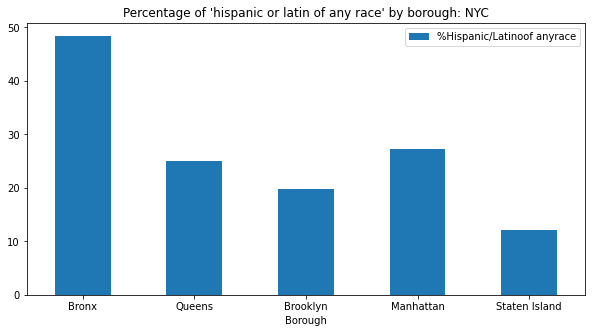

In [221]:
ax = df2.plot.bar(x='Borough', y='%Hispanic/Latinoof anyrace', rot=0, title="Percentage of 'hispanic or latin of any race' by borough: NYC", figsize=(10,5), fontsize = 10, legend=True)

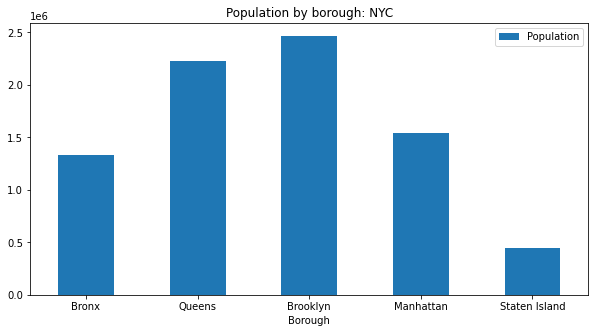

In [206]:
ax = df2.plot.bar(x='Borough', y='Population', rot=0, title="Population by borough: NYC", figsize=(10,5))

In [208]:
# Let's calculate the hispanic size per borough
df2["target_population"] = df2["Population"] * df2["%Hispanic/Latinoof anyrace"] / 100

#Let's sort by descending to make the chart easier to read
df2 = df2.sort_values(by=['target_population'], ascending=False)

df2

,Borough,Population,%white,%blackorAfricanAmerican,%Asian,%Other,%mixedrace,%Hispanic/Latinoof anyrace,target_population
4,Bronx,1332650,29.9,35.6,3.0,25.7,5.8,48.4,645002.600
2,Queens,2229379,44.1,20.0,17.6,12.3,6.1,25.0,557344.750
1,Brooklyn,2465326,41.2,36.4,7.5,10.6,4.3,19.8,488134.548
3,Manhattan,1537195,54.4,17.4,9.4,14.7,4.1,27.2,418117.040
5,Staten Island,443728,77.6,9.7,5.7,4.3,2.7,12.1,53691.088


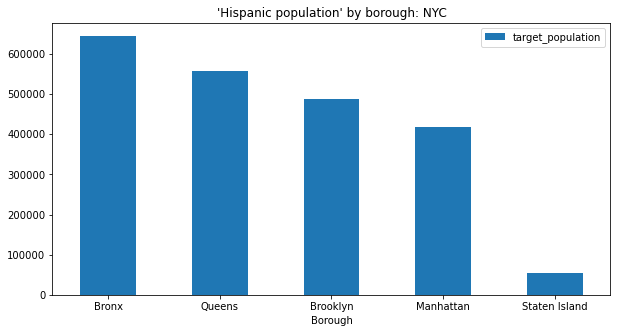

In [209]:
ax = df2.plot.bar(x='Borough', y='target_population', rot=0, title="'Hispanic population' by borough: NYC", figsize=(10,5), legend=True, sort_columns=True ) 

## Let's get data for neighbourhoods and borough from NYC data source
First I look in the web browser at https://cocl.us/new_york_dataset and can see it is a JSON file.

I can use the function we defined previously to process the JSON file and retrieve the data

In [184]:
url='https://cocl.us/new_york_dataset'
ny_data = get_new_york_data(url)
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Let's see how many rows we have in the dataset

In [185]:
ny_data.shape

(306, 4)

So there are total of 306 different Neighborhoods in New York.  

## Initial Data Analysis

Now let's analyze our initial data. 

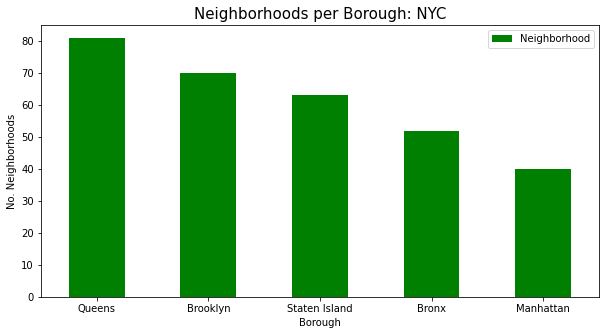

In [224]:
clr = "green"

# Count number of neighbourhoods per borough and sort by number to make the chart easier to read
ny_data.groupby('Borough')['Neighborhood'].count().sort_values(ascending=False).plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No. Neighborhoods',fontsize = 10)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

## Let's analyze further and use Fourthsquare to see how many Mexican restaurants there are in each neighborhood and borough. 

In [253]:
# prepare neighborhood list that contains Mexican restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
mex_rest_nyc=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude) # use function defeined previously
    mex_restaurants=venues[venues['Category']=='Mexican Restaurant']   
#    print('(',count,'/',len(ny_data),')','Mexican Restaurants in '+Neighborhood+', '+Borough+':'+str(len(mex_restaurants)))
#    print(row)
    for resturant_detail in mex_restaurants.values.tolist():
        id, name , category=resturant_detail
        mex_rest_nyc = mex_rest_nyc.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

KeyError: 'groups'

In [227]:
# mex_rest_nyc.to_csv('mex_rest_nyc.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
mex_rest_nyc.to_csv('mex_rest_nyc.csv') 

In [254]:
mex_rest_nyc = pd.read_csv('mex_rest_nyc.csv')
mex_rest_nyc.tail()

,Unnamed: 0,Borough,Neighborhood,ID,Name
119,119,Brooklyn,Dumbo,4f69f2b76d86f87117bb13ab,Gran Eléctrica
120,120,Brooklyn,Homecrest,507e08fae4b0998ce3421276,El Mexicano Restaurante & Cafe Inc
121,121,Brooklyn,Homecrest,4a3ada26f964a5205fa01fe3,La Villita Mexican Restaurant
122,122,Bronx,Kingsbridge Heights,4b403740f964a520e8b625e3,Montezuma Mexican Restaurant
123,123,Bronx,Kingsbridge Heights,4e4c9e1318388d49816b44d8,La Catrina


In [255]:
mex_rest_nyc.shape

(124, 5)

We got 124 Mexican Restaurants across the New York City. 

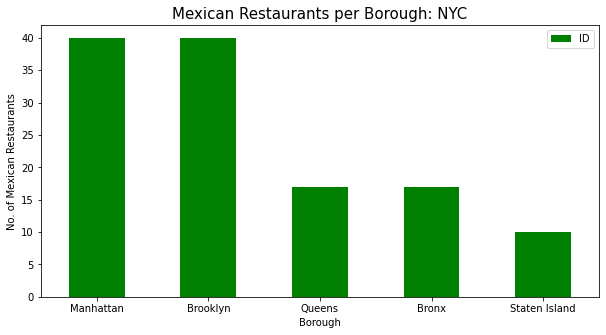

In [256]:
mex_rest_nyc.groupby('Borough')['ID'].count().sort_values(ascending=False).plot.bar(figsize=(10,5), color=clr)
plt.title('Mexican Restaurants per Borough: NYC', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No. of Mexican Restaurants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

We can also see that Manhattan and Brooklyn have the highest number of Mexcian restaurants, although Manhattan have the least number of neighbourhoods.
To our surpise Queens that have the highest number of hispanic population and percentage, does only have 16 or 17 Mexican restaurants.

So perhaps the hispanic population is more skewed towards other latin cusine preference like Puerta rican or dominican food, but we will leave that outside the scope of this project.

Let's check how many restaurants the top 15 neighborhoods have

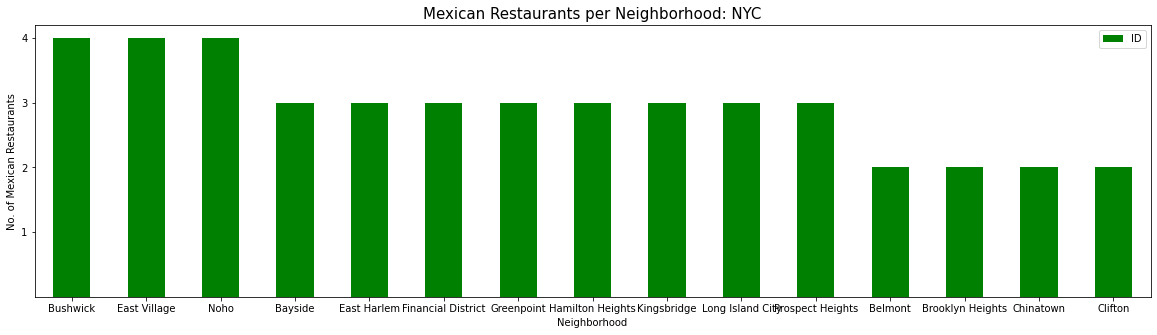

In [257]:
NOofNeigh = 15
mex_rest_nyc.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(20,5), color=clr)
plt.title('Mexican Restaurants per Neighborhood: NYC', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 10)
plt.ylabel('No. of Mexican Restaurants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.yticks([1,2,3,4])
plt.legend()
plt.show()

## We can see that no neighborhood really stands out.
- Bushwich is in Brooklyn
- East Village is in Manhattan
- Noho is in Manhattan

East village and Noho are next to each other, 

## Let's us investigate Manhattan further 

In [267]:
mex_manhattan = mex_rest_nyc[mex_rest_nyc['Borough']=='Manhattan']
mex_manhattan

,Unnamed: 0,Borough,Neighborhood,ID,Name
48,48,Manhattan,Chinatown,5885471a0037eb3b6c2973d2,Factory Tamal
49,49,Manhattan,Chinatown,58f55261419a9e48f4dd0706,JaJaJa Plantas Mexicana
50,50,Manhattan,Washington Heights,4b2c33d0f964a520aac324e3,Refried Beans Mexican Restaurant
51,51,Manhattan,Washington Heights,55b0383b498e6ae332e61ea7,La Pinata
52,52,Manhattan,Inwood,4b0885d1f964a520a20d23e3,Guadalupe Bar and Grill
53,53,Manhattan,Inwood,53e58cd0498e01b8fae39b41,Made in Mexico
54,54,Manhattan,Hamilton Heights,57274808498e7db363dcc4bc,Oso
55,55,Manhattan,Hamilton Heights,575a15f6498e0db46deded82,Frijolito's
56,56,Manhattan,Hamilton Heights,534aace3498e249ceb4111dc,Agave Mexican & American Grill
57,57,Manhattan,Manhattanville,4acfe332f964a520afd620e3,El Porton


In [277]:
#mex_rest_nyc = mex_rest_nyc.drop(columns=["Unnamed: 0"])
mex_rest_nyc

,Borough,Neighborhood,ID,Name
0,Bronx,Kingsbridge,5217dd2811d2d06ccafb77d3,Estrellita Poblana V
1,Bronx,Kingsbridge,553d5376498e322eb4d37a1b,Chipotle Mexican Grill
2,Bronx,Kingsbridge,4ce81d330f196dcb5d2b43ae,Picante Picante Mexican Restaurant
3,Bronx,Norwood,4f0f71a1e4b061b771f6b4a6,Mar y Tierra Restaurant and Lounge
4,Bronx,Bedford Park,4bab9998f964a520c8b73ae3,OK Mr. Pancho
5,Bronx,Melrose,5591837d498ee4167d48bb73,Cinco de Mayo
6,Bronx,Hunts Point,5b901665dd70c5002c9f6cbc,City Tamale Inc
7,Bronx,Parkchester,4b4929d2f964a520656826e3,Taqueria Tlaxcali
8,Bronx,Westchester Square,4b720280f964a520d9692de3,Estrellita Poblana IV
9,Bronx,Westchester Square,5e7dc30676db98000832f0d6,Chipotle Mexican Grill


### Let's get the ranking of each restaurant from Fourthsquare

In [281]:
ID="4e4c9e1318388d49816b44d8"
venue_details=get_venue_details(ID)
print(venue_details)

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '600da4ed0d7dc976f750996f'}, 'response': {}}


KeyError: 'venue'

In [278]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
mex_rest_stats_nyc=pd.DataFrame(columns=column_names)
count=1
for row in mex_rest_nyc.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(mex_rest_nyc),')','processed')
    mex_rest_stats_nyc = mex_rest_stats_nyc.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
mex_rest_stats_nyc.tail()

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '600da4a4095fbc19cbf6408c'}, 'response': {}}


KeyError: 'venue'

In [18]:
japanese_rest_stats_ny.to_csv('japanese_rest_stats_ny_csv.csv') # As I move through this project I continue to save data to a .csv file 

In [19]:
japanese_rest_stats_ny.shape

(75, 7)

We got statistics for all 77 Japanese Restaurants in New York city. 

Let's check what values we have in our DataFrame

In [20]:
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
Borough         75 non-null object
Neighborhood    75 non-null object
ID              75 non-null object
Name            75 non-null object
Likes           75 non-null object
Rating          75 non-null float64
Tips            75 non-null object
dtypes: float64(1), object(6)
memory usage: 4.2+ KB


We see that the values like Likes, Tips are string values. We would need to convert them into float for further analysis

In [22]:
japanese_rest_stats_ny['Likes'] = japanese_rest_stats_ny['Likes'].astype('float64')
japanese_rest_stats_ny['Tips'] = japanese_rest_stats_ny['Tips'].astype('float64')
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
Borough         75 non-null object
Neighborhood    75 non-null object
ID              75 non-null object
Name            75 non-null object
Likes           75 non-null float64
Rating          75 non-null float64
Tips            75 non-null float64
dtypes: float64(3), object(4)
memory usage: 4.2+ KB


## Now when the data types look correct, let's continue our analysis.

In [23]:
japanese_rest_stats_ny.describe()

,Likes,Rating,Tips
count,75.000000,75.000000,75.000000
mean,151.333333,7.893333,46.800000
std,245.116152,1.542666,71.590049
min,0.000000,0.000000,0.000000
25%,11.000000,7.650000,6.000000
50%,46.000000,8.200000,14.000000
75%,185.000000,8.700000,61.500000
max,1213.000000,9.300000,354.000000


In [24]:
# Resturant with maximum Likes
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                    Flatiron
ID              4f7b61f6e4b07aaa5d524842
Name                 OOTOYA 大戸屋 (OOTOYA)
Likes                               1213
Rating                               9.1
Tips                                 273
Name: 68, dtype: object

In [25]:
# Resturant with maximum Ratings
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                East Village
ID              510c85e7e4b0056826b88297
Name                                Kura
Likes                                209
Rating                               9.3
Tips                                  61
Name: 30, dtype: object

In [26]:
# Resturant with maximum Tips
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Chelsea
ID              454f7cc4f964a520dc3c1fe3
Name                            Morimoto
Likes                                790
Rating                               8.9
Tips                                 354
Name: 28, dtype: object

## Now let's identify and visualize neighborhood with the maximum average rating of restaurants

In [27]:
ny_neighborhood_stats=japanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
9,Cobble Hill,9.100000
36,North Side,9.100000
15,Flatiron,8.975000
12,East Village,8.950000
25,Hunters Point,8.933333
16,Fort Greene,8.900000
1,Boerum Hill,8.800000
10,Downtown,8.800000
33,Midtown South,8.800000
6,Chelsea,8.750000


Above are the top neighborhoods with the highest average ratings of Japanese restaurants.

In [28]:
ny_borough_stats=japanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.455882
0,Brooklyn,8.135000
2,Queens,7.178571
3,Staten Island,5.900000


Similarly these are the average ratings of Japanese Restaurants for each Borough

## Let's visualize the results

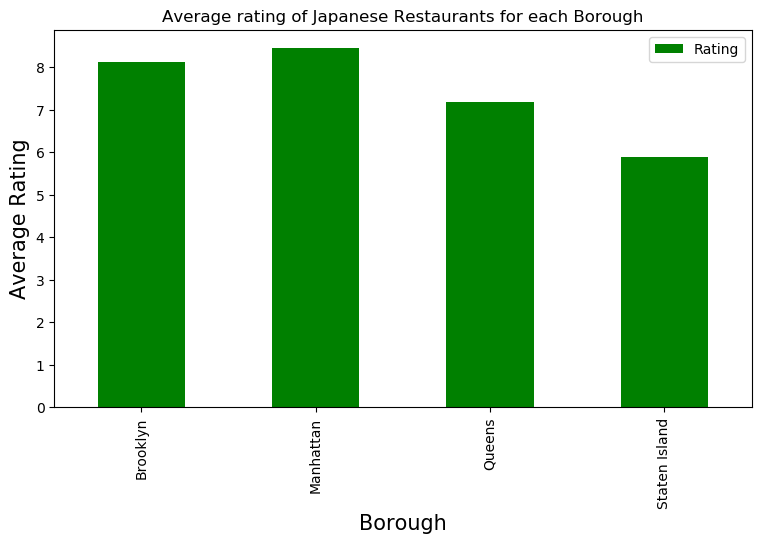

In [29]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Japanese Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
japanese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

In [30]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
1,Boerum Hill,8.800000
2,Brooklyn Heights,8.300000
6,Chelsea,8.750000
9,Cobble Hill,9.100000
10,Downtown,8.800000
11,Dumbo,8.100000
12,East Village,8.950000
14,Financial District,8.350000
15,Flatiron,8.975000
16,Fort Greene,8.900000


We will join this Dataset to original New York data to get longitude and latitude

In [31]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Boerum Hill,40.685683,-73.983748,8.800000
1,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.300000
2,Manhattan,Chelsea,40.744035,-74.003116,8.750000
3,Staten Island,Chelsea,40.594726,-74.189560,8.750000
4,Brooklyn,Cobble Hill,40.687920,-73.998561,9.100000
5,Brooklyn,Downtown,40.690844,-73.983463,8.800000
6,Brooklyn,Dumbo,40.703176,-73.988753,8.100000
7,Manhattan,East Village,40.727847,-73.982226,8.950000
8,Manhattan,Financial District,40.707107,-74.010665,8.350000
9,Manhattan,Flatiron,40.739673,-73.990947,8.975000


Now we will show this data on a map

In [32]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Let's add a new field to dataframe for labeling purpose

In [34]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

## Results / Conclusion 

Manhattan and Brooklyn have the best rated Japanese restaurants on average. Staten Island and The Bronx have the least amount of Japanese restaurants per borough. However, of note, Murray Hill in Manhattan has the highest number of Japanese Restaurants in all of NY. Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most number of Japanese restaurants. Based on the above information, I would state that Manhattan and Brooklyn are the best locations for Japanese cuisine in NYC. To have the best shot of success, I would open a Japanese restaurant in Brooklyn. Brooklyn has multiple neighborhoods with average ratings exceeding 8.0 on a scale of 1.0 to 10.0 and has less amount of Japanese restaurants than Manhattan, making competition easier. Also we should keep in mind, that real estate prices in Brooklyn are much cheaper than in Manhattan. Finally, I would go to OOTOYA in Manhattan for the best Japanese food based on 1213 likes. As a final note, all of the above analysis is depended on the accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.